# Analysis of Chicago Parking Tickets Data - 2

##  Visualize the most recent Expired Parking Tickets Conditions in 2018

## Result Figure 2: 
![image.png](./2018_q1.png)

## Code:

### 1) Preprocess the data

Prepare the data by years: 
Option 1: run __TDI_proj_1.ipynb__ first before running this file

Option 2: run the python __file proj_2_pre.py__ to get the City of Chicago Parking Ticket dadta split accoding to concerned years.

First need to download the City of Chicago Parking Ticket data from https://www.propublica.org/datastore/dataset/chicago-parking-ticket-data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import geocoder
import requests

In [2]:
# Load data of 2018
year = '2015'
#filename_c = 'issue_2018.csv'
filename_c = 'issue_' + year + '.csv'
data = pd.read_csv(filename_c, sep=',', low_memory=False) 

start_t = year + '-01'
end_t = year + '-04'
mask = (data['issue_date']>= start_t) & (data['issue_date']<= end_t)
data = data.loc[mask]

In [3]:
# get rid of "Expired plate or registration" data
data = data[~data.violation_description.str.contains("EXPIRED PLATE OR TEMPORARY REGISTRATION")]

In [4]:
# Get Expired meter violation
violations = data['violation_description']
vio_cont = violations.value_counts()
vio_meter = vio_cont['EXP. METER NON-CENTRAL BUSINESS DISTRICT'] +\
            vio_cont['EXPIRED METER CENTRAL BUSINESS DISTRICT']            
vio_total = len(violations)
vioRate_meter = vio_meter/ vio_total
print('Expired meter violation rate = ' + str(vioRate_meter))

Expired meter violation rate = 0.17720279328939006


The rate is bit higher since the data is not completed for 2018. Only 5 months covered.

In [5]:
# put expired meters violation in a dataframe
searchfor = ['EXP. METER NON-CENTRAL BUSINESS DISTRICT',
             'EXPIRED METER CENTRAL BUSINESS DISTRICT']
meters = data[data.violation_description.str.contains('|'.join(searchfor))]

In [6]:
# visulaize geographically
geo_file = 'hacknight_sample_data_geocode.csv'
addrs_df = pd.read_csv(geo_file)
addrs_df['address'] = addrs_df['address'] + ', chicago, il'


In [7]:
# add geo info
geocoded_df = pd.merge(left=meters, right=addrs_df, how='inner', on='address')
geocoded_df.head()

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,...,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,lat,lng
0,65523914,2015-01-01 03:40:00,720 N FRANKLIN,769f0744941c643fc4a30ed5c4f33d9b7126c9909d5dc7...,IL,HCP,NaN,0964190B,EXPIRED METER CENTRAL BUSINESS DISTRICT,18.0,...,0.0,Define,2015-01-16 00:00:00,NaN,NaN,0,8940,"700 n franklin, chicago, il",41.894814,-87.635708
1,65523911,2015-01-01 08:30:00,750 N FRANKLIN,4d7fc8f422bbc039d1731ccbf555fa8f3f801902f150b4...,IL,PAS,600773803.0,0964190B,EXPIRED METER CENTRAL BUSINESS DISTRICT,18.0,...,65.0,Paid,2015-03-15 00:00:00,DETR,NaN,5189999910,8940,"700 n franklin, chicago, il",41.894814,-87.635708
2,65523912,2015-01-01 08:32:00,710 N FRANKLIN,1761c8f1337bf7f714697460d781835c06d7a6d0370119...,IL,PAS,NaN,0964190B,EXPIRED METER CENTRAL BUSINESS DISTRICT,18.0,...,65.0,Paid,2015-02-06 00:00:00,NaN,NaN,0,8940,"700 n franklin, chicago, il",41.894814,-87.635708
3,65523913,2015-01-01 08:35:00,710 N FRANKLIN,9145bc72594a1db55d42fa7b87153b86493f3626c47f3f...,IL,PAS,600041649.0,0964190B,EXPIRED METER CENTRAL BUSINESS DISTRICT,18.0,...,65.0,Paid,2015-03-16 00:00:00,DETR,NaN,5189999920,8940,"700 n franklin, chicago, il",41.894814,-87.635708
4,65523915,2015-01-01 08:40:00,705 N FRANKLIN,67b8caafdf077efd5feb4f61903a9bebb95314f3daaffa...,IL,PAS,600894600.0,0964190B,EXPIRED METER CENTRAL BUSINESS DISTRICT,18.0,...,65.0,Paid,2015-02-27 00:00:00,VIOL,NaN,5188068940,8940,"700 n franklin, chicago, il",41.894814,-87.635708


In [8]:
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
point_maker = lambda x: Point(x['lng'], x['lat'])
geocoded_df.apply(point_maker, axis=1)

geocoded_df['geometry'] = geocoded_df.apply(point_maker, axis=1)
geocoded_df.head()

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,...,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,lat,lng,geometry
0,65523914,2015-01-01 03:40:00,720 N FRANKLIN,769f0744941c643fc4a30ed5c4f33d9b7126c9909d5dc7...,IL,HCP,NaN,0964190B,EXPIRED METER CENTRAL BUSINESS DISTRICT,18.0,...,Define,2015-01-16 00:00:00,NaN,NaN,0,8940,"700 n franklin, chicago, il",41.894814,-87.635708,POINT (-87.63570848794916 41.89481372734157)
1,65523911,2015-01-01 08:30:00,750 N FRANKLIN,4d7fc8f422bbc039d1731ccbf555fa8f3f801902f150b4...,IL,PAS,600773803.0,0964190B,EXPIRED METER CENTRAL BUSINESS DISTRICT,18.0,...,Paid,2015-03-15 00:00:00,DETR,NaN,5189999910,8940,"700 n franklin, chicago, il",41.894814,-87.635708,POINT (-87.63570848794916 41.89481372734157)
2,65523912,2015-01-01 08:32:00,710 N FRANKLIN,1761c8f1337bf7f714697460d781835c06d7a6d0370119...,IL,PAS,NaN,0964190B,EXPIRED METER CENTRAL BUSINESS DISTRICT,18.0,...,Paid,2015-02-06 00:00:00,NaN,NaN,0,8940,"700 n franklin, chicago, il",41.894814,-87.635708,POINT (-87.63570848794916 41.89481372734157)
3,65523913,2015-01-01 08:35:00,710 N FRANKLIN,9145bc72594a1db55d42fa7b87153b86493f3626c47f3f...,IL,PAS,600041649.0,0964190B,EXPIRED METER CENTRAL BUSINESS DISTRICT,18.0,...,Paid,2015-03-16 00:00:00,DETR,NaN,5189999920,8940,"700 n franklin, chicago, il",41.894814,-87.635708,POINT (-87.63570848794916 41.89481372734157)
4,65523915,2015-01-01 08:40:00,705 N FRANKLIN,67b8caafdf077efd5feb4f61903a9bebb95314f3daaffa...,IL,PAS,600894600.0,0964190B,EXPIRED METER CENTRAL BUSINESS DISTRICT,18.0,...,Paid,2015-02-27 00:00:00,VIOL,NaN,5188068940,8940,"700 n franklin, chicago, il",41.894814,-87.635708,POINT (-87.63570848794916 41.89481372734157)


In [9]:
# Get census tacts of Chicargo
ZIP_SHP_PATH = os.path.join('zip://', 'CensusTracts2010.zip')
coord_system = {'init': 'epsg:4326'}
chicago_census_tracts = gpd.read_file(ZIP_SHP_PATH).to_crs({'init': 'epsg:4326'})

In [10]:
def assign_census_tracts(df, shape_df, locid_var='census_tract_id'):
    """Joins DataFrame with region shapefile.
    This function takes a DataFrame containing latitude and longitude values and
    a GeopandasDataFrame that describes regions that those lat-long pairs are sorted
    into. This should facilitate pairing with Census data that can introduce other
    features like racial demographics.
    Parameters
    ----------
    df : pandas.DataFrame or dask.DataFrame
        DataFrame containing latitudes, longitudes, and location_id columns.
    shape_df:    a GeopandasDataFrame containing regions to map to.
    locid_var : string
        Name of series to return. 
    """

    # make a copy since we will modify lats and lons
#     localdf = df[['lng', 'lat']].copy()
    localdf = df.copy()
    
    # missing lat lon info is indicated by nan. Fill with zero
    # which is outside New York shapefile. 
    localdf['lng'] = localdf['lng'].fillna(value=0.)
    localdf['lat'] = localdf['lat'].fillna(value=0.)
    
    shape_df = shape_df.to_crs({'init': 'epsg:4326'})

    try:
        local_gdf = gpd.GeoDataFrame(
            localdf, crs={'init': 'epsg:4326'},
            geometry=[Point(xy) for xy in zip(localdf['lng'], localdf['lat'])]
        )

        local_gdf = gpd.sjoin(local_gdf, shape_df, how='left', op='within')

        return local_gdf
    except ValueError as ve:
        print(ve)
        print(ve.stacktrace())
        series = localdf['lng']
        series = np.nan
        return series

In [11]:
full_df = assign_census_tracts(geocoded_df, chicago_census_tracts)

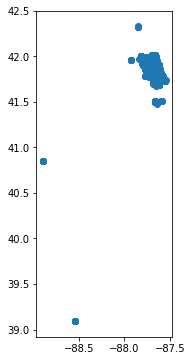

In [12]:
full_df.head()
full_df.plot(figsize=(12,6))

In [13]:
# Load Chicago city bound
ZIP_SHP_PATH = os.path.join('zip://', 'data', 'Boundaries - City.zip')
coord_system = {'init': 'epsg:4326'}
chicago_boundary = gpd.read_file(ZIP_SHP_PATH)

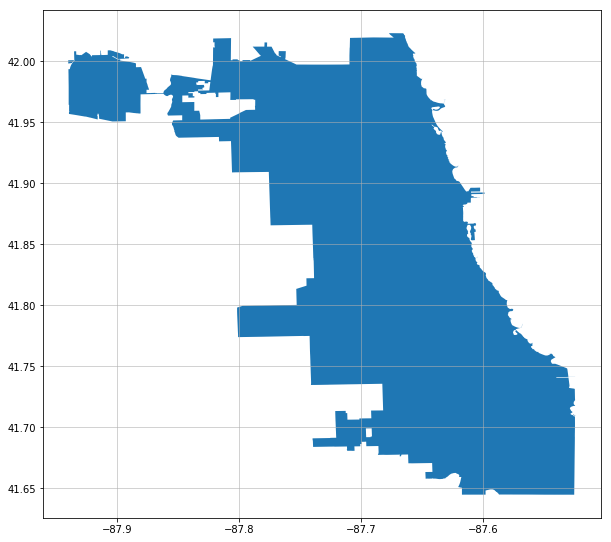

In [14]:
# Visualize Chicago city bound
fig, ax = plt.subplots(figsize=(10,10))
chicago_boundary.plot(ax=ax)
ax.grid(True, alpha=0.7)

In [15]:
# eliminate the outside points
outside_points = full_df[(full_df['lat'] <= 41.63) | (full_df['lat'] >= 42.05) | 
                         (full_df['lng'] <= -88.0) | (full_df['lng'] >= -87.5)]
outside_points.shape

(73, 36)

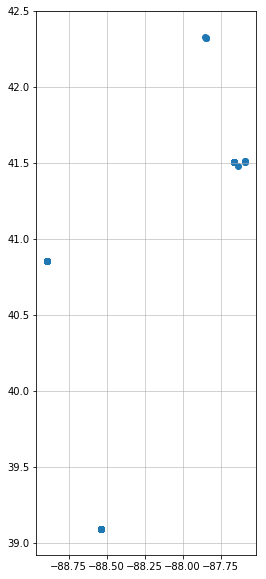

In [16]:
# see the outsider coordinates
fig, ax = plt.subplots(figsize=(15,10))
outside_points.plot(ax=ax)
ax.grid(True, alpha=0.7)

In [17]:
class GeoSessions:
    def __init__(self):
        self.Arcgis = requests.Session()
        self.Komoot = requests.Session()
        self.USCensus = requests.Session()
        self.OSM = requests.Session()

def create_sessions():
    return GeoSessions()

In [18]:
def geocode_address(address, s):
    g = geocoder.komoot(address, session=s.Komoot)
    if (g.ok == False):
        g = geocoder.osm(address, session=s.OSM)        
    if (g.ok == False):
        g = geocoder.uscensus(address, session=s.USCensus)
    if (g.ok == False):
        g = geocoder.arcgis(address, session=s.Arcgis)

    return g

In [19]:
s = create_sessions()

In [20]:
for ind in outside_points.index:
    tmp = geocode_address(geocoded_df.loc[ind, 'address'], s)
    geocoded_df.loc[ind, 'lat'] = tmp.lat
    geocoded_df.loc[ind, 'lng'] = tmp.lng

full_df.loc[outside_points.index, 'lat'] = geocoded_df.loc[outside_points.index, 'lat']
full_df.loc[outside_points.index, 'lng'] = geocoded_df.loc[outside_points.index, 'lng']

Status code Unknown from http://photon.komoot.de/api: ERROR - HTTPConnectionPool(host='photon.komoot.de', port=80): Read timed out. (read timeout=5.0)
Status code Unknown from http://photon.komoot.de/api: ERROR - HTTPConnectionPool(host='photon.komoot.de', port=80): Read timed out. (read timeout=5.0)


In [21]:
full_df.loc[outside_points.index, 'geometry'] = full_df.iloc[outside_points.index].apply(point_maker, axis=1)

In [22]:
# Look for points out of bounding box
outside_points2 = full_df[(full_df['lat'] <= 41.63) | (full_df['lat'] >= 42.05) | 
                          (full_df['lng'] <= -88.0) | (full_df['lng'] >= -87.5)]

In [23]:
outside_points2.shape


(52, 36)

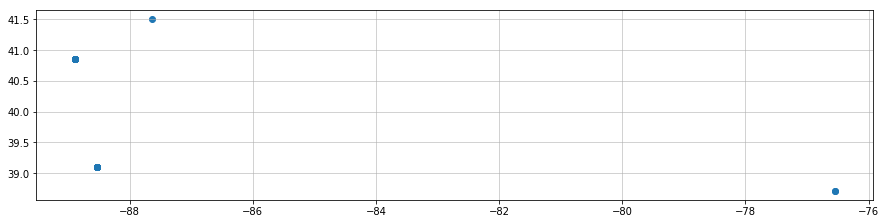

In [24]:
fig, ax = plt.subplots(figsize=(15,10))
outside_points2.plot(ax=ax)
ax.grid(True, alpha=0.7)

In [25]:
# Look for points within that bounding box, but also outside of Chicago's boundary.
chicago_poly = chicago_boundary.geometry.unary_union
outside_chicago = full_df[~full_df.geometry.within(chicago_poly)]
outside_chicago.shape

(53, 36)

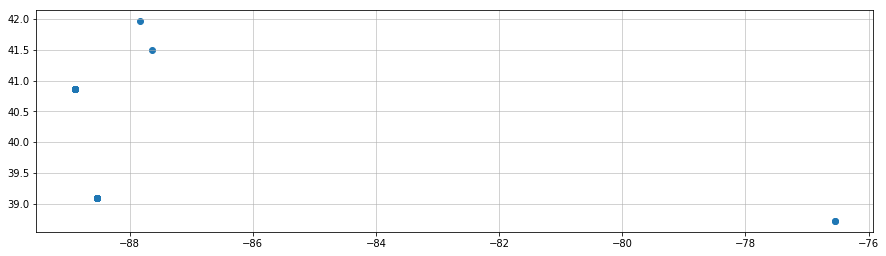

In [26]:
fig, ax = plt.subplots(figsize=(15,10))
outside_chicago.plot(ax=ax)
ax.grid(True, alpha=0.7)

In [27]:
def geocode_address(address, s):
    g = geocoder.komoot(address, session=s.Komoot)
    if (g.ok == False):
        g = geocoder.osm(address, session=s.OSM)        
    if (g.ok == False):
        g = geocoder.uscensus(address, session=s.USCensus)
    if (g.ok == False):
        g = geocoder.arcgis(address, session=s.Arcgis)
    return g

s = create_sessions()

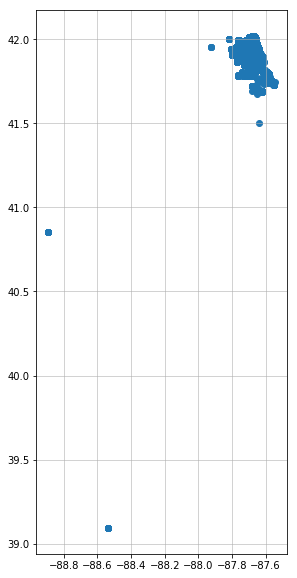

In [28]:
for ind in outside_chicago.index:
    tmp = geocode_address(full_df.loc[ind, 'address'], s)
    full_df.loc[ind, 'lat'] = tmp.lat
    full_df.loc[ind, 'lng'] = tmp.lng

full_df.loc[outside_chicago.index, 'geometry'] = full_df.iloc[outside_chicago.index].apply(point_maker, axis=1)


fig, ax = plt.subplots(figsize=(15,10))
full_df.plot(ax=ax)
ax.grid(True, alpha=0.7)


Text(0.5, 1.0, 'Year 2018 Geolocation Distribution of Expired Meter Tickets')

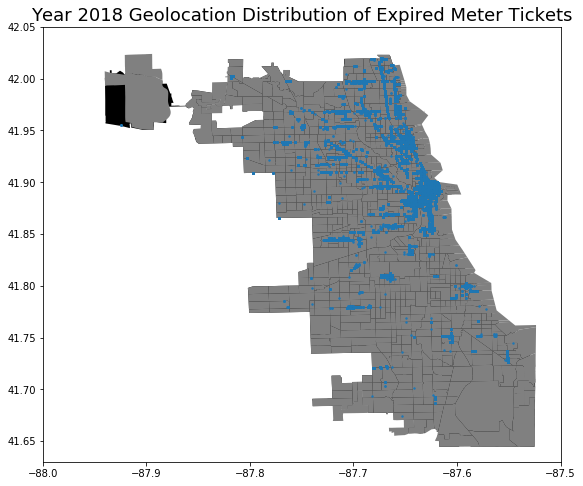

In [29]:
fig, ax = plt.subplots(figsize = (12,8))
chicago_boundary.plot(ax=ax, color='black')
chicago_census_tracts.plot(ax=ax, color='grey')
full_df.plot(ax=ax,markersize = 2, marker = 'o', label = "Expired Meter Tickets",)
plt.xlim(-88.0, -87.5)
plt.ylim(41.63,42.05)
plt.title("Year 2018 Geolocation Distribution of Expired Meter Tickets",fontsize=18)

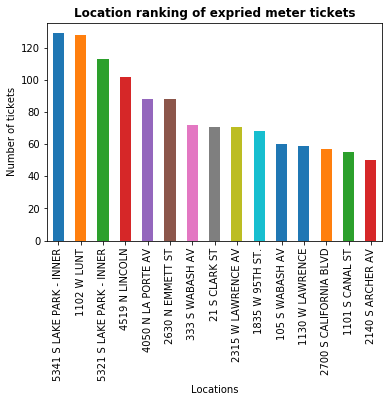

In [30]:
counts_ = full_df['violation_location'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Locations')
ax.set_ylabel('Number of tickets' )
ax.set_title('Location ranking of expried meter tickets', fontweight='bold')
counts_[:15].plot(ax=ax, kind='bar')


def countToList(counts):
    lst = []
    for i, v in counts.items():
        #print(i,v)
        lst.append([i,v])
    return lst

counts = countToList(counts_)



counts = pd.DataFrame(counts)
counts.columns=['violation_location', 'amount_tickets']

loc_df = full_df[['violation_location', 'lat','lng']]

counts_df = pd.merge(counts, loc_df, on='violation_location', how='inner')

counts = counts_df.drop_duplicates()

counts = counts.sort_values(by='amount_tickets')

lng = counts['lng']
lat = counts['lat']
counts_amounts = counts['amount_tickets']






(-88.0, -87.5, 41.63, 42.05)

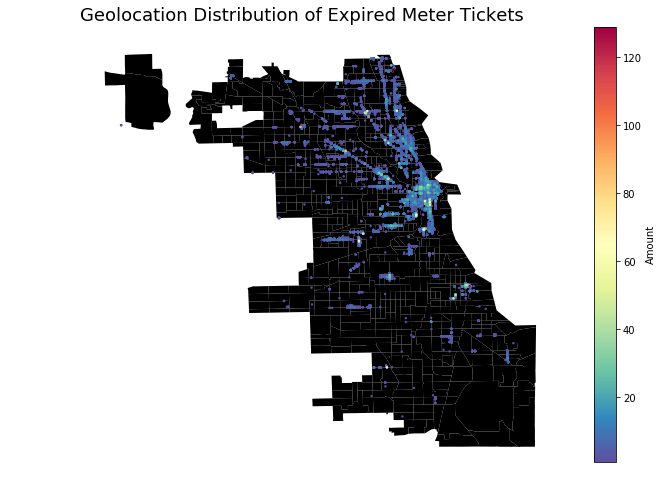

In [31]:
import matplotlib.colors as colors

fig, ax = plt.subplots(figsize = (12,8))
chicago_census_tracts.plot(ax=ax, color='black')
marker_size = 2
norm=colors.Normalize(vmin=counts_amounts.min(), vmax=counts_amounts.max())
cmap = 'Spectral_r'
plt.scatter(lng, lat, marker_size, c=counts_amounts, norm=norm, cmap=cmap,alpha=1)
cbar = plt.colorbar()
cbar.set_label('Amount')
plt.xlim(-88.0, -87.5)
plt.ylim(41.63,42.05)
#title_str = "Year " + year +" 1st Quarter Geolocation Distribution of Expired Meter Tickets"
title_str = "Geolocation Distribution of Expired Meter Tickets"
plt.title(title_str, fontsize=18)
ax.axis('off')
